Install Required Libraries

PyTorch: Deep learning framework.
Torch-Geometric: A library for machine learning on graph-structured data.
SciPy: Used for scientific and technical computing, and necessary for loading our data.

In [ ]:
!pip install torch torch-geometric
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Mount Google Drive into the Colab Interface

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Optional :- to see whether the required drive contents are available

In [ ]:
!ls /content/drive/MyDrive/GNN_Approach/Data_files/

Coherence.mat  PLV.mat


GCNConv: convolutional layer for graph data.
global_mean_pool: pooling layer that computes the mean of node features across the graph.
Data: class used to create graph data objects. DataLoader: class used to load graph data in batches.
NumPy library for numerical computing in Python.
scikit-learn : Provides utilities for machine learning

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Load the Coherance data from .mat file

The brain connectivity data matrix is loaded to the colab interface

In [ ]:
# Define the path to your .mat file
mat_file_path = '/content/drive/MyDrive/GNN_Approach/Data_files/PLV.mat'

# Load the .mat file
mat = scipy.io.loadmat(mat_file_path)

# Access the PLV data
PLV_data = mat['PLV'][0, 0]

Optional :- To visualize the data in coherance.mat struct

In [ ]:
print(coherence_data)

(array([[[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
        [1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ]],

       [[0.045302 , 0.018553 , 0.0067204, ..., 0.019476 , 0.0046354,
         0.050195 ],
        [0.19019  , 0.029937 , 0.068315 , ..., 0.24841  , 0.079368 ,
         0.037184 ],
        [0.37098  , 0.032771 , 0.040591 , ..., 0.12305  , 0.13582  ,
         0.016301 ],
        [0.26684  , 0.019146 , 0.03734  , ..., 0.091717 , 0.12578  ,
         0.007978 ],
        [0.21679  , 0.036511 , 0.022681 , ..., 0.049675 , 0.074151 ,
         0.018815 ]],

       [[1.       , 1.       , 1.       , ..., 1.       , 1.       ,
         1.       ],
     

# Extracting data in diffrent categories ( AZ, FTD,HC )

Initially the data is extracted and then they are converted into numpy arrays

In [ ]:
# Extract the specific fields for Alzheimer's (AZ), Frontotemporal dementia (FTD), and Healthy Controls (HC)
PLV_AZ_F = PLV_data['AZ']
PLV_FTD_F = PLV_data['FTD']
PLV_HC_F = PLV_data['HC']

# Extract the 3rd frequency band 3 of each matrix
# reshape

PLV_AZ = PLV_AZ_F[:, 2, :].reshape(2346, 1, 36)
PLV_FTD = PLV_FTD_F[:, 2, :].reshape(2346, 1, 23)
PLV_HC = PLV_HC_F[:, 2, :].reshape(2346, 1, 29)


In [ ]:
# Normalize the data
PLV_AZ = (PLV_AZ - np.mean(PLV_AZ)) / np.std(PLV_AZ)
PLV_FTD = PLV_FTD - np.mean(PLV_FTD)) / np.std(PLV_FTD)
PLV_HC = (PLV_HC - np.mean(PLV_HC)) / np.std(PLV_HC)

In [ ]:
Threshold = 0.6

# Set the values less than 0.5 to zero
PLV_AZ[PLV_AZ <Threshold] = 0
PLV_FTD[PLV_FTD < Threshold] = 0
PLV_HC[PLV_HC <Threshold] = 0

# Set the values greater than or equal to 0.5 to one
PLV_AZ[PLV_AZ >=Threshold] = 1
PLV_FTD[PLV_FTD >=Threshold] = 1
PLV_HC[PLV_HC >= Threshold] = 1

oPtional:- to test whether the data is converted properly into numpy arrays

In [ ]:
# Print shapes to debug
print(PLV_AZ.shape)
print(PLV_FTD.shape)
print(PLV_HC.shape)

(2346, 1, 36)
(2346, 1, 23)
(2346, 1, 29)


visualize the first 10 data points

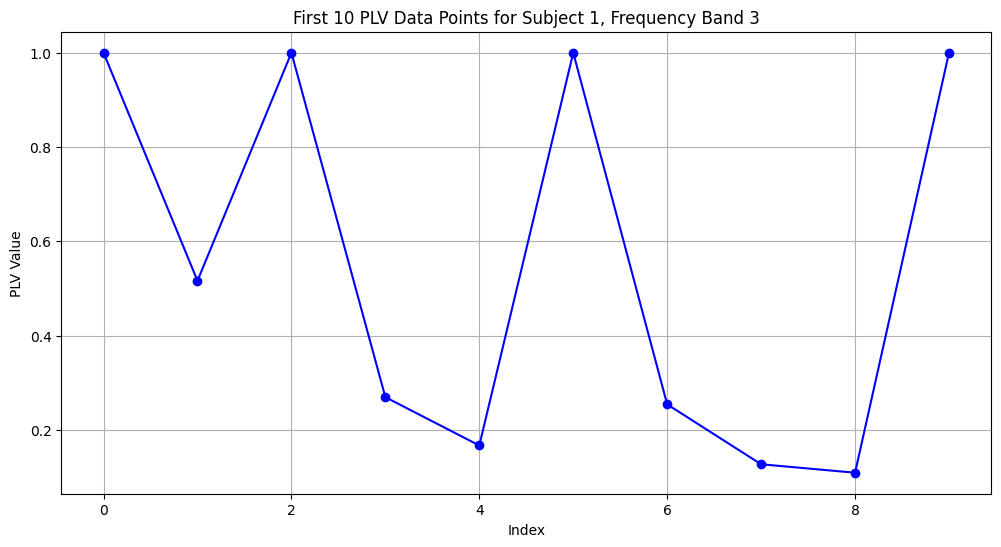

In [ ]:
# Extract the 1D array from PVe_AZ
data_to_visualize = PLV_AZ[:, 0, 0]

# Visualize only the first 50 data points
data_to_visualize_first_10 = data_to_visualize[:10]

# Plot the 1D array
plt.figure(figsize=(12, 6))
plt.plot(data_to_visualize_first_10, marker='o', linestyle='-', color='b')
plt.title('First 10 PLV Data Points for Subject 1, Frequency Band 3')
plt.xlabel('Index')
plt.ylabel('PLV Value')
plt.grid(True)
plt.show()


Reconstruct the matrix by the data file

In [ ]:
def rebuild_matrix(PLV_data):
    n_regions = 68
    n_data = PLV_data.shape[2]
    n_bands = PLV_data.shape[1]

    # Initialize the array to hold the 68x68 matrices
    rebuilt_data = np.zeros((n_regions, n_regions, n_bands, n_data))

    # Iterate over each subject and each frequency band
    for band in range(n_bands):
        for subject in range(n_data):
            # Initialize an empty 68x68 matrix
            matrix = np.zeros((n_regions, n_regions))

            # Fill the upper triangular part column by column
            idx = 0
            for col in range(n_regions):
                for row in range(col + 1):
                    matrix[row, col] = PLV_data[idx, band, subject]
                    idx += 1

            # Mirror to the lower triangular part
            matrix = matrix + matrix.T - np.diag(matrix.diagonal())

            # Store the matrix in the rebuilt data array
            rebuilt_data[:, :, band, subject] = matrix

    return rebuilt_data

# Rebuild the coherence matrices
PLV_AZ_rebuilt = rebuild_matrix(PLV_AZ)
PLV_FTD_rebuilt = rebuild_matrix(PLV_FTD)
PLV_HC_rebuilt = rebuild_matrix(PLV_HC)

To check the shapes of the rebuilt matrix

In [ ]:
print('PLV_AZ_rebuilt shape:', PLV_AZ_rebuilt.shape)
print('PLV_FTD_rebuilt shape:', PLV_FTD_rebuilt.shape)
print('PLV_HC_rebuilt shape:',PLV_HC_rebuilt.shape)

PLV_AZ_rebuilt shape: (68, 68, 1, 36)
PLV_FTD_rebuilt shape: (68, 68, 1, 23)
PLV_HC_rebuilt shape: (68, 68, 1, 29)


Visualize the first matrix in coherence_AZ_rebuilt

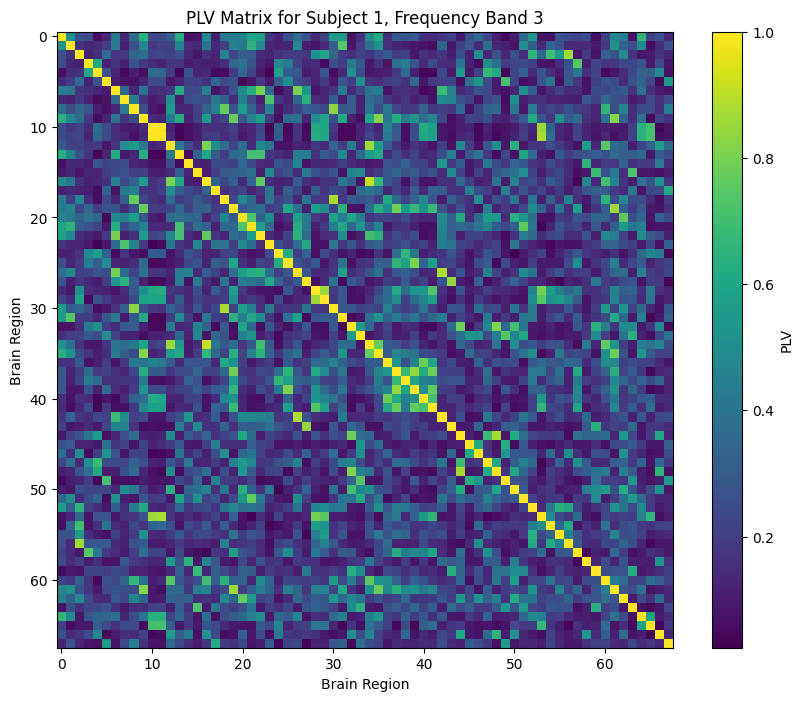

In [ ]:
# Visualize the first matrix in coherence_AZ_rebuilt
matrix_to_visualize = PLV_AZ_rebuilt[:, :, 0, 0]

# Create a heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(matrix_to_visualize, cmap='viridis', interpolation='none')
plt.colorbar(label='PLV')
plt.title('PLV Matrix for Subject 1, Frequency Band 3')
plt.xlabel('Brain Region')
plt.ylabel('Brain Region')
plt.show()

# Convert PLV Matrix to Graph Data

create_graph function takes a PLV matrix and a label as input and outputs a graph data object.
number of nodes is determined by the shape of the matrix.
initialize lists to store the edges and their corresponding attributes.
Iterate through the matrix to create edges between all pairs of nodes (excluding self-loops) and assign edge attributes based on the coherence values.
edge indices and attributes are converted to PyTorch tensors.
Initialize node features with ones or other meaningful values. Create a Data object from the node features, edge indices, edge attributes, and the label.


In [ ]:
# Function to convert PLV matrix to a graph
def create_graph(matrix, label):
    num_nodes = matrix.shape[0]  # number of nodes (68)
    edge_index = []
    edge_attr = []

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                edge_index.append([i, j])
                edge_attr.append(matrix[i, j])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    #x = torch.ones((num_nodes, 1))  # Node features can be set to 1
    x = torch.zeros((num_nodes, 1))  # Node features can be set to 0

    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

# Prepare Graph Datasets

prepare_dataset function takes coherence data and a label as input and creates a list of graph data objects. iterate through the coherence data, typically representing different frequency bands, to create individual graphs for each band. Each graph object is appended to the dataset list.Then the label is assigned based on the input label parameter.


In [ ]:
# Prepare the datasets
def prepare_dataset(data, label):
    dataset = []
    for i in range(data.shape[3]):
        for j in range(data.shape[2]):
            matrix = data[:, :, j, i]
            graph = create_graph(matrix, label)
            dataset.append(graph)
    return dataset

# Prepare datasets
az_dataset = prepare_dataset(PLV_AZ_rebuilt, 0)  #  Alzheimer's patients
hc_dataset = prepare_dataset(PLV_HC_rebuilt, 1)  # Healthy subjects
ftd_dataset = prepare_dataset(PLV_FTD_rebuilt, 2)  #  Frontotemporal dementia patients


Combine Datasets and Create Data Loaders

The data set of 3 categories are concatenated into a single data set. Then the data is Splitted into training and testing. test size is 20% and random seed is set here. Then the data loades are created.


In [ ]:
# Combine datasets
dataset = az_dataset + hc_dataset + ftd_dataset

# Split into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


Define and Initialize the Message Passing Neural Network (MPNN) Model

In [ ]:
from torch_geometric.nn import MessagePassing

class MPNN(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(MPNN, self).__init__(aggr='mean')
        self.lin = torch.nn.Linear(in_channels, out_channels)
        self.edge_transform = torch.nn.Linear(1, out_channels)

    def forward(self, x, edge_index, edge_attr):
        # Update edge features first
        edge_attr = self.edge_transform(edge_attr.unsqueeze(-1))
        # Start propagating messages.
        return self.propagate(edge_index, x=x, edge_attr=edge_attr)

    def message(self, x_j, edge_attr):
        # x_j: Neighbor node features.
        # edge_attr: Edge features.
        return x_j + edge_attr

    def update(self, aggr_out):
        return aggr_out

# Define the full model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.mpnn1 = MPNN(1, 32)
        self.mpnn2 = MPNN(32, 32)
        self.fc = torch.nn.Linear(32, 3)
        self.dropout = torch.nn.Dropout(p=0.1)

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.mpnn1(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.mpnn2(x, edge_index, edge_weight)
        x = F.relu(x)
        x = self.dropout(x)
        x = global_mean_pool(x, data.batch)
        x = self.fc(x)
        return F.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()


# Training and Testing Loop

In [ ]:
# Training loop
def train():
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()

def test():
    model.eval()
    correct = 0
    for data in test_loader:
        out = model(data)
        pred = out.argmax(dim=1)
        correct += int((pred == data.y).sum())
    return correct / len(test_data)


In [ ]:
# Training and Testing

# Run the training and testing loop
for epoch in range(1, 200):
    train()
    if epoch % 10 == 0:
        test_acc = test()
        print(f'Epoch {epoch}, Test Accuracy: {test_acc:.4f}')

# Initialize lists to store training loss and accuracy
train_losses = []
test_accuracies = []
epochs = []

Epoch 10, Test Accuracy: 0.1111
Epoch 20, Test Accuracy: 0.4444
Epoch 30, Test Accuracy: 0.1111
Epoch 40, Test Accuracy: 0.4444
Epoch 50, Test Accuracy: 0.4444
Epoch 60, Test Accuracy: 0.3333
Epoch 70, Test Accuracy: 0.4444
Epoch 80, Test Accuracy: 0.5000
Epoch 90, Test Accuracy: 0.4444
Epoch 100, Test Accuracy: 0.4444
Epoch 110, Test Accuracy: 0.4444
Epoch 120, Test Accuracy: 0.5000
Epoch 130, Test Accuracy: 0.5000
Epoch 140, Test Accuracy: 0.5000
Epoch 150, Test Accuracy: 0.4444
Epoch 160, Test Accuracy: 0.5000
Epoch 170, Test Accuracy: 0.5000
Epoch 180, Test Accuracy: 0.5000
Epoch 190, Test Accuracy: 0.4444


Epoch 10, Test Accuracy: 0.5227
Epoch 10, Test Accuracy: 0.4886
Epoch 10, Test Accuracy: 0.5000
Epoch 10, Test Accuracy: 0.4659
Epoch 10, Test Accuracy: 0.4545
Epoch 10, Test Accuracy: 0.4545
Epoch 10, Test Accuracy: 0.4205
Epoch 10, Test Accuracy: 0.4091
Epoch 10, Test Accuracy: 0.4091
Epoch 10, Test Accuracy: 0.4091
Epoch 10, Test Accuracy: 0.4091
Epoch 10, Test Accuracy: 0.4205
Epoch 10, Test Accuracy: 0.4205
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4205
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4318
Epoch 10, Test Accuracy: 0.4205
Epoch 10, Test Accuracy: 0.4205
Epoch 20, Test Accuracy: 0.5114
Epoch 20, Test Accuracy: 0.5114
Epoch 20, Test Accuracy: 0.5000
Epoch 20, Test Accuracy: 0.5114
Epoch 20, Test Accuracy: 0.5000
Epoch 20, Test Accuracy: 0.5000
Epoch 20, Test Accuracy: 0.5000
Epoch 20, Test Accuracy: 0.5000
Epoch 20, Test Accuracy: 0.5000
Epoch 20

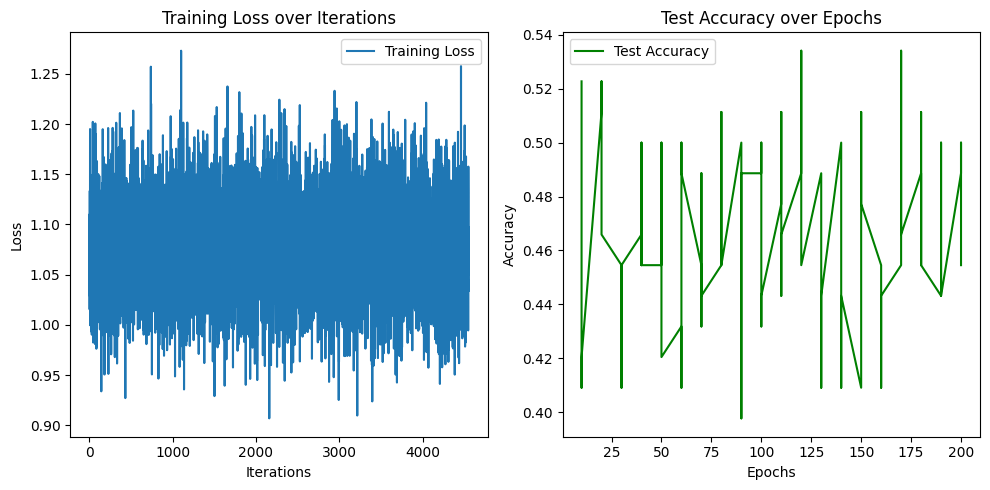

In [ ]:
# Training loop with visualization
for epoch in range(1, 201):
    model.train()
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        if epoch % 10 == 0:
            test_acc = test()
            test_accuracies.append(test_acc)
            epochs.append(epoch)
            print(f'Epoch {epoch}, Test Accuracy: {test_acc:.4f}')

# Plotting training loss and test accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()